In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Loading and Preprocessing

In [4]:
from sklearn.datasets import load_iris

In [8]:
iris = load_iris()

In [10]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [16]:
df['species'] = iris.target

In [18]:
df_clustering = df.drop('species', axis=1)

In [20]:
df_clustering.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# 2. Clustering Algorithm Implementation 

### KMeans clustering 
It partitions data into K clusters by assigning each data point to the nearest cluster centroid and iteratively updating the centroids until convergence.
It is suitable for the Iris dataset because it effectively separates data into distinct groups based on similarities and works well with small, well-structured datasets like Iris.

In [27]:
from sklearn.cluster import KMeans

In [29]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df_clustering)

C:\Users\manue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\manue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [33]:
df_clustering['KMeans_Cluster'] = kmeans_labels

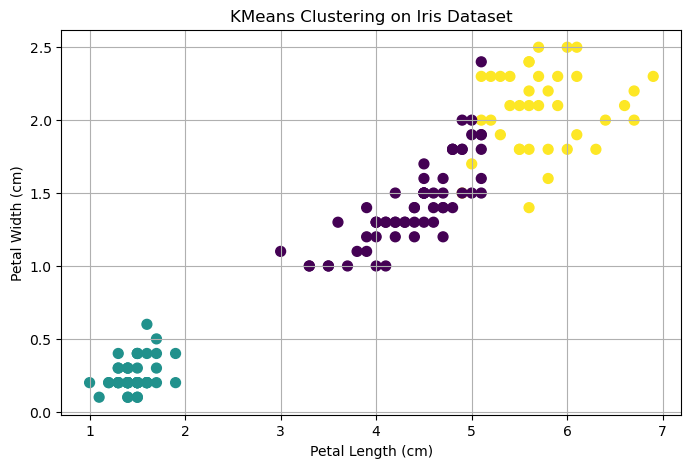

In [40]:
plt.figure(figsize=(8, 5))
plt.scatter(df_clustering['petal length (cm)'], df_clustering['petal width (cm)'], 
            c=kmeans_labels, cmap='viridis', s=50)
plt.title("KMeans Clustering on Iris Dataset")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.grid(True)
plt.show()

### Hierarchical clustering
It builds a hierarchy of clusters either by progressively merging smaller clusters (agglomerative) or splitting larger ones (divisive), visualized using a dendrogram.
It is suitable for the Iris dataset as it helps identify natural groupings and does not require predefining the number of clusters.

In [43]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [45]:
linkage_matrix = linkage(df_clustering.drop('KMeans_Cluster', axis=1), method='ward')

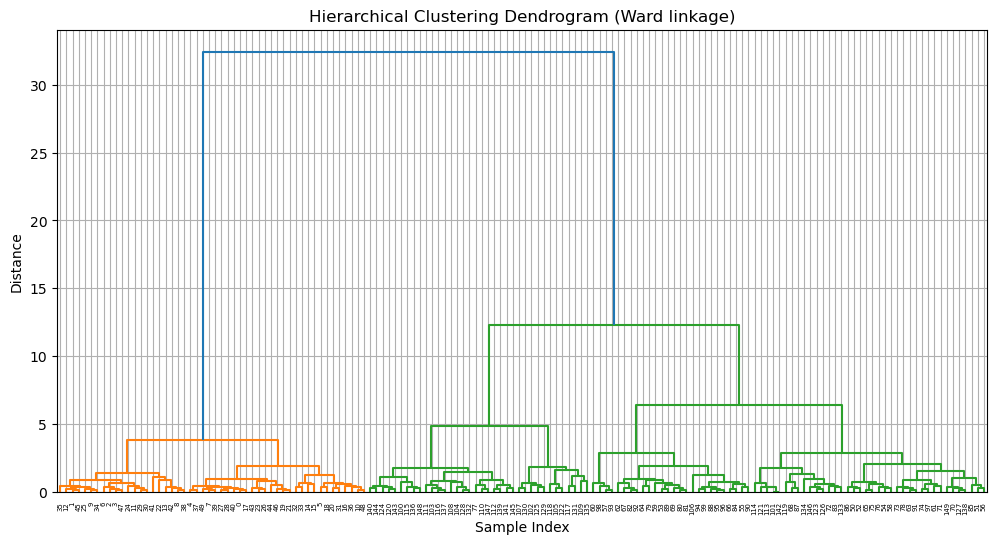

In [49]:
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, leaf_rotation=90)  # Rotates the labels
plt.title("Hierarchical Clustering Dendrogram (Ward linkage)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

In [53]:
agg_cluster = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_cluster.fit_predict(df_clustering.drop('KMeans_Cluster', axis=1))

In [55]:
df_clustering['Hierarchical_Cluster'] = agg_labels

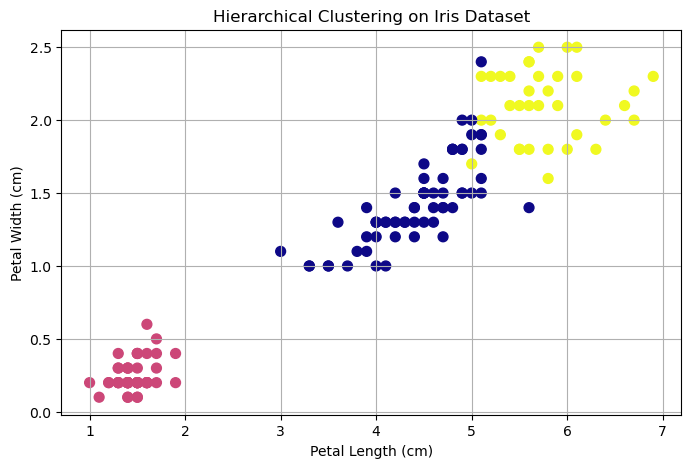

In [57]:
plt.figure(figsize=(8, 5))
plt.scatter(df_clustering['petal length (cm)'], df_clustering['petal width (cm)'],
            c=agg_labels, cmap='plasma', s=50)
plt.title("Hierarchical Clustering on Iris Dataset")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.grid(True)
plt.show()